In [26]:
# Dataset - https://github.com/codebrainz/color-names/blob/master/output/colors.csv

import cv2
import pandas as pd

img_path = r'C:\Users\Fahi\Desktop\Color-Detection-OpenCV-main\Color-Detection-OpenCV-main\IMG20211020164134.jpg'
img = cv2.imread(img_path)

# declaring global variables (are used later on)
clicked = False
r = g = b = x_pos = y_pos = 0

# Reading csv file with pandas and giving names to each column
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)


# function to calculate minimum distance from all colors and get the most matching color
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname


In [19]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import ImageColor

In [15]:
def rgb_to_hex(rgb_color):
    hex_color= "#"
    for i in rgb_color:
        i=int(i)
        hex_color +=("{:02x}".format(i))
    return hex_color

In [4]:
img_name='colorpic.jpg'
raw_img=cv2.imread(img_name)
raw_img=cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB)

In [6]:
img=cv2.resize(raw_img,(900,600),interpolation=cv2.INTER_AREA)
img.shape

(600, 900, 3)

In [8]:
img=img.reshape(img.shape[0]*img.shape[1],3)
img.shape

(540000, 3)

In [12]:
clf=KMeans(n_clusters=5)
color_lables=clf.fit_predict(img)
center_colors=clf.cluster_centers_

In [13]:
counts=Counter(color_lables)
counts

Counter({1: 125576, 2: 76374, 4: 122774, 0: 94896, 3: 120380})

In [35]:
ordered_colors=[center_colors[i] for i in counts.keys()]
hex_colors=[rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
most_dominant_color=hex_colors[0]                       
print(most_dominant_color)

#bf4c25


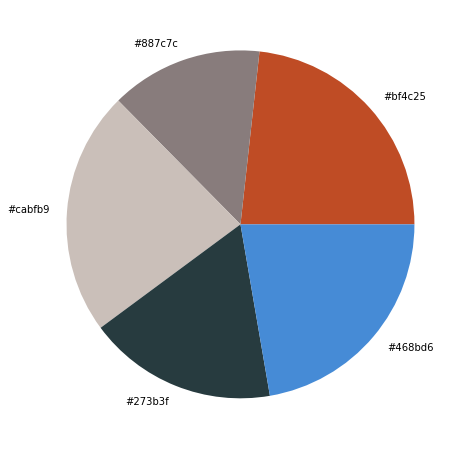

In [37]:
plt.figure(figsize=(12,8))
plt.pie(counts.values(),labels=hex_colors,colors=hex_colors)
plt.savefig(f'img_name[:4]=analysis.png')

In [30]:
rgb_code=ImageColor.getcolor(most_dominant_color, "RGB")
R,G,B=rgb_code[0:]
final_color=get_color_name(R,G,B)
print(final_color)

Dark Pastel Red
